In [1]:
# from huggingface_hub import login
# login()

In [ ]:
import datasets
from datasets import load_dataset

In [45]:
# Get dataset
cv_4_0 = load_dataset(
    "facebook/covost2",
    "en_de",
    data_dir="/Users/ahava/datasets/common_voice/common_voice_4",
    split="train",
    # streaming=True,
    trust_remote_code=True
)

In [46]:
#cv_4_0 = cv_4_0.select_columns(['audio', 'sentence', 'client_id', "translation"])
print(cv_4_0)

Dataset({
    features: ['client_id', 'file', 'audio', 'sentence', 'translation', 'id'],
    num_rows: 289430
})


In [54]:
data = next(iter(cv_4_0))
audio = data["audio"]["array"]
sample_rate = data["audio"]["sampling_rate"]
transcription = data["sentence"]
translation = data["translation"]



In [56]:
print(f"data: {data}")
print(f"Audio array: {audio}")
print(f"Sample rate: {data['audio']['sampling_rate']}")
print(f"Audio shape: {audio.shape}, Sample rate: {sample_rate}")
print(f"Audio length(s): {audio.size / sample_rate:.2f} seconds")
print(f"Transcription: {transcription}")
print(f"translation: {translation}")

data: {'client_id': '4f29be8fe932d773576dd3df5e111929f4e222422322450983695eaa8625a12659cd3e999a061a29ebe71783833bebdc2d0ec6b97e9a648bf6d28979065f85ad', 'file': '/Users/ahava/datasets/common_voice/common_voice_4/clips/common_voice_en_19664034.mp3', 'audio': {'path': '/Users/ahava/datasets/common_voice/common_voice_4/clips/common_voice_en_19664034.mp3', 'array': array([-3.55271368e-15, -1.77635684e-14,  2.04281037e-14, ...,
       -9.88327083e-05, -4.29642620e-04, -4.69887513e-04], shape=(106368,)), 'sampling_rate': 16000}, 'sentence': '"These data components in turn serve as the ""building blocks"" of data exchanges."', 'translation': 'Diese Datenkomponenten wiederum dienen als die „Grundbausteine“ zum Datenaustausch.', 'id': 'common_voice_en_19664034'}
Audio array: [-3.55271368e-15 -1.77635684e-14  2.04281037e-14 ... -9.88327083e-05
 -4.29642620e-04 -4.69887513e-04]
Sample rate: 16000
Audio shape: (106368,), Sample rate: 16000
Audio length(s): 6.65 seconds
Transcription: "These data co

In [49]:
from IPython.display import Audio
Audio(audio, rate=sample_rate)

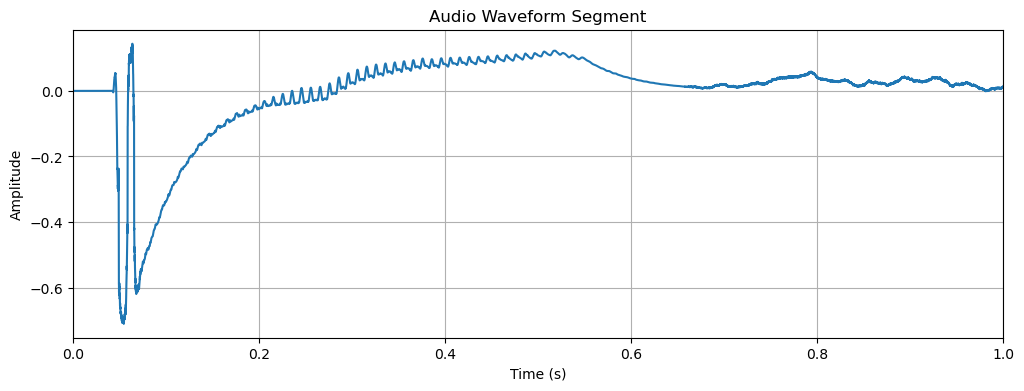

In [44]:
import matplotlib.pyplot as plt
import numpy as np

start_time_ms = 0
end_time_ms = 1000  # 1 second
start_sample = int(start_time_ms * sample_rate / 1000)
end_sample = int(end_time_ms * sample_rate / 1000)
audio_segment = audio[start_sample:end_sample]
plt.figure(figsize=(12, 4))
plt.plot(np.arange(start_sample, end_sample) / sample_rate, audio_segment)
plt.title("Audio Waveform Segment")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(start_time_ms / 1000, end_time_ms / 1000)
plt.grid()
plt.show()

In [11]:
cv_17_de = load_dataset(
    "mozilla-foundation/common_voice_17_0",
    "de",
    split="train",
    streaming=True,
    trust_remote_code=True
)
cv_17_de = cv_17_de.select_columns(['audio', 'sentence', 'client_id', 'path'])

In [12]:
data_de = next(iter(cv_17_de))
audio_de = data_de["audio"]["array"]
sample_rate_de = data_de["audio"]["sampling_rate"]
transcription_de = data_de["sentence"]

Reading metadata...: 589100it [00:20, 28168.42it/s]


In [13]:
print(f"Audio array: {audio_de}")
print(f"Sample rate: {data_de['audio']['sampling_rate']}")
print(f"Audio shape: {audio_de.shape}, Sample rate: {sample_rate_de}")
print(f"Audio length(s): {audio_de.size / sample_rate_de:.2f} seconds")
print(f"Transcription: {transcription_de}")

Audio array: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.82462700e-07
 -1.51965287e-06 -1.07558265e-06]
Sample rate: 48000
Audio shape: (312192,), Sample rate: 48000
Audio length(s): 6.50 seconds
Transcription: Alle Fluchtwege sind abgeschnitten.


In [37]:
from IPython.display import Audio
Audio(audio_de, rate=sample_rate_de)

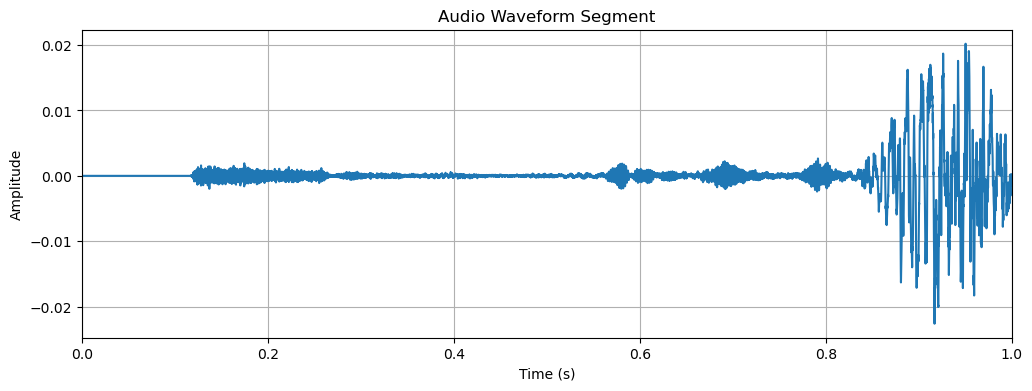

In [41]:
import matplotlib.pyplot as plt
import numpy as np

start_time_ms = 0
end_time_ms = 1000  # 1 second
start_sample = int(start_time_ms * sample_rate / 1000)
end_sample = int(end_time_ms * sample_rate / 1000)
audio_segment = audio_de[start_sample:end_sample]
plt.figure(figsize=(12, 4))
plt.plot(np.arange(start_sample, end_sample) / sample_rate, audio_segment)
plt.title("Audio Waveform Segment")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(start_time_ms / 1000, end_time_ms / 1000)
plt.grid()
plt.show()